<a href="https://colab.research.google.com/github/Amiya-Kalita/Machine-Learning/blob/main/1_PCA_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , classification_report
import seaborn as sns

In [ ]:
np.random.seed(42)

# Loading MNIST dataset
df = pd.read_csv("/content/sample_data/mnist_test.csv")
print("DataSet shape :",df.shape)
df.head()

DataSet shape : (9999, 785)


,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y = df.iloc[:,0].values
y.shape

(9999,)

In [ ]:
x = df.iloc[:,1:].values
x.shape

(9999, 784)

In [ ]:
# Normalize pixel values to range [0, 1]
# This is important because PCA is sensitive to the scale of features
x = x / 255.0

print("Pixel value range after normalization:")
print("Min:", x.min(), "Max:", x.max())

# Alternative: Standardization (zero mean, unit variance)
# This is recommended when features have different scales
scaler = StandardScaler()
x_standardized = scaler.fit_transform(x)

print("\nAfter standardization:")
print("Mean:", x_standardized.mean())
print("Std:", x_standardized.std())

Pixel value range after normalization:
Min: 0.0 Max: 1.0

After standardization:
Mean: -2.667520924722542e-18
Std: 0.9230605702371489


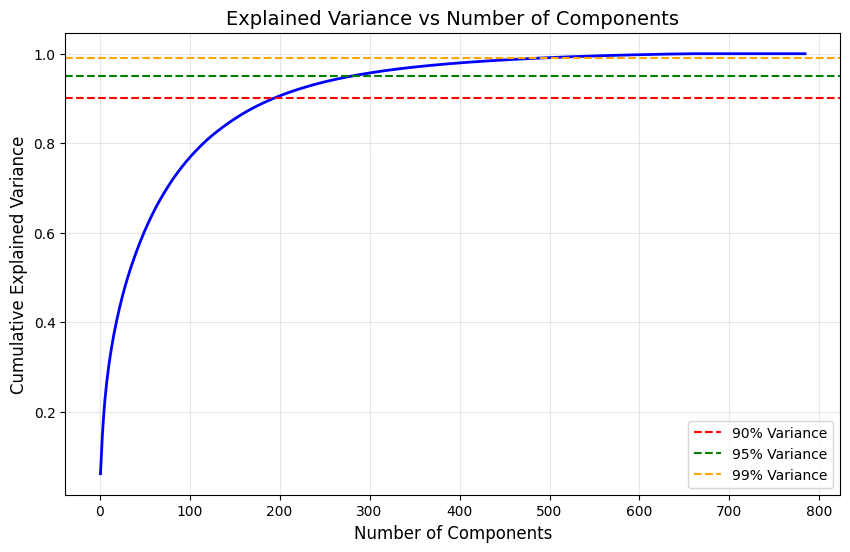

Components needed for 90.0% variance: 193
Components needed for 95.0% variance: 280
Components needed for 99.0% variance: 486


In [ ]:
# First, let's apply PCA with all components to see variance explained
pca_full = PCA()
pca_full.fit(x_standardized)

# Calculate cumulative variance explained
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot cumulative variance explained
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'b-', linewidth=2)
plt.xlabel('Number of Components', fontsize=12)
plt.ylabel('Cumulative Explained Variance', fontsize=12)
plt.title('Explained Variance vs Number of Components', fontsize=14)
plt.grid(True, alpha=0.3)

# Add horizontal lines at 90%, 95%, and 99% variance
plt.axhline(y=0.90, color='r', linestyle='--', label='90% Variance')
plt.axhline(y=0.95, color='g', linestyle='--', label='95% Variance')
plt.axhline(y=0.99, color='orange', linestyle='--', label='99% Variance')
plt.legend()
plt.show()

# Find number of components for different variance thresholds
for variance in [0.90, 0.95, 0.99]:
    n_components = np.argmax(cumulative_variance >= variance) + 1
    print(f"Components needed for {variance*100}% variance: {n_components}")

In [ ]:
# Let's use 95% variance (usually a good balance)
# This will significantly reduce dimensions while keeping important info

n_components = 100  # You can adjust based on previous step

# Create PCA object with selected components
pca = PCA(n_components=n_components)

# Fit PCA on the data and transform it
x_pca = pca.fit_transform(x_standardized)

In [ ]:
print(f"\nOriginal shape: {x_standardized.shape}")
print(f"Reduced shape: {x_pca.shape}")
print(f"Variance explained by {n_components} components: {pca.explained_variance_ratio_.sum():.4f}")

# Show variance explained by first 10 components
print("\nVariance explained by first 10 principal components:")
for i in range(min(10, n_components)):
    print(f"PC{i+1}: {pca.explained_variance_ratio_[i]:.4f} ({pca.explained_variance_ratio_[i]*100:.2f}%)")


Original shape: (9999, 784)
Reduced shape: (9999, 100)
Variance explained by 100 components: 0.7678

Variance explained by first 10 principal components:
PC1: 0.0620 (6.20%)
PC2: 0.0424 (4.24%)
PC3: 0.0404 (4.04%)
PC4: 0.0323 (3.23%)
PC5: 0.0276 (2.76%)
PC6: 0.0241 (2.41%)
PC7: 0.0205 (2.05%)
PC8: 0.0188 (1.88%)
PC9: 0.0167 (1.67%)
PC10: 0.0152 (1.52%)


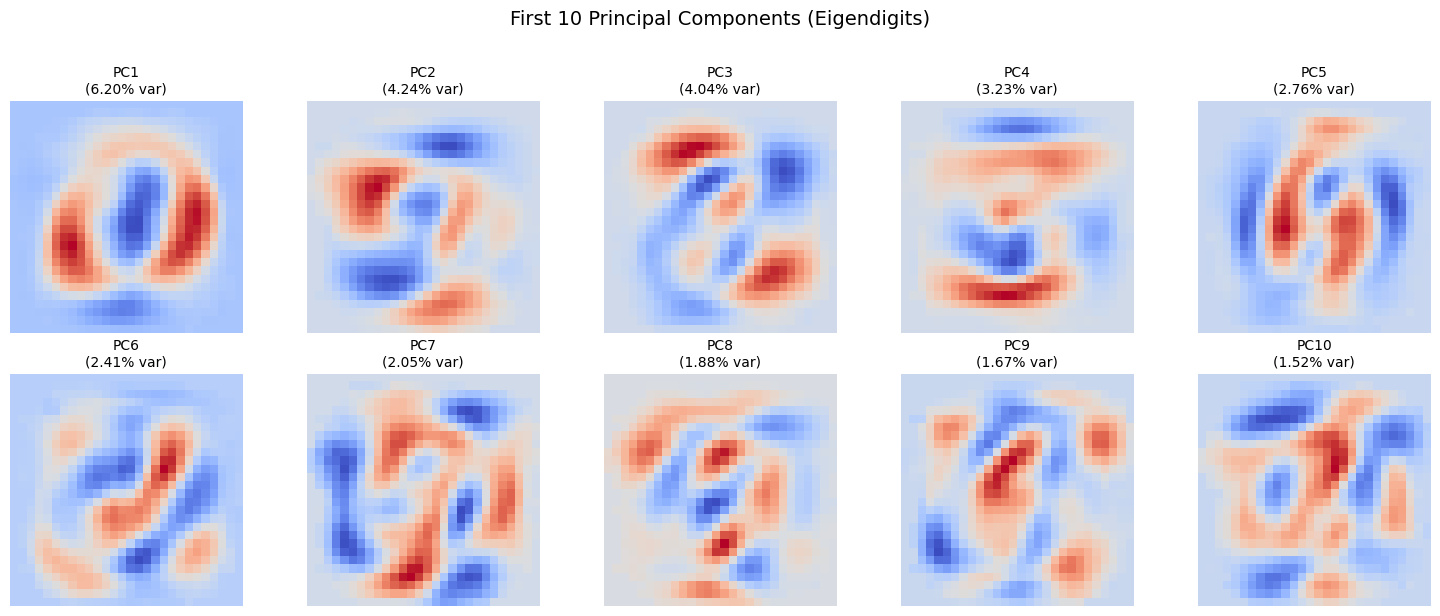

In [ ]:
# Visualize the first few principal components as images
# These show the patterns PCA learned from the data

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()

for i in range(10):
    # Reshape principal component to 28x28 image
    component_image = pca.components_[i].reshape(28, 28)

    axes[i].imshow(component_image, cmap='coolwarm')
    axes[i].set_title(f'PC{i+1}\n({pca.explained_variance_ratio_[i]*100:.2f}% var)',
                      fontsize=10)
    axes[i].axis('off')

plt.suptitle('First 10 Principal Components (Eigendigits)', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# These "eigendigits" show the main patterns that distinguish digits

In [ ]:
pca_2d = PCA(n_components=2)
x_2d = pca_2d.fit_transform(x_standardized)

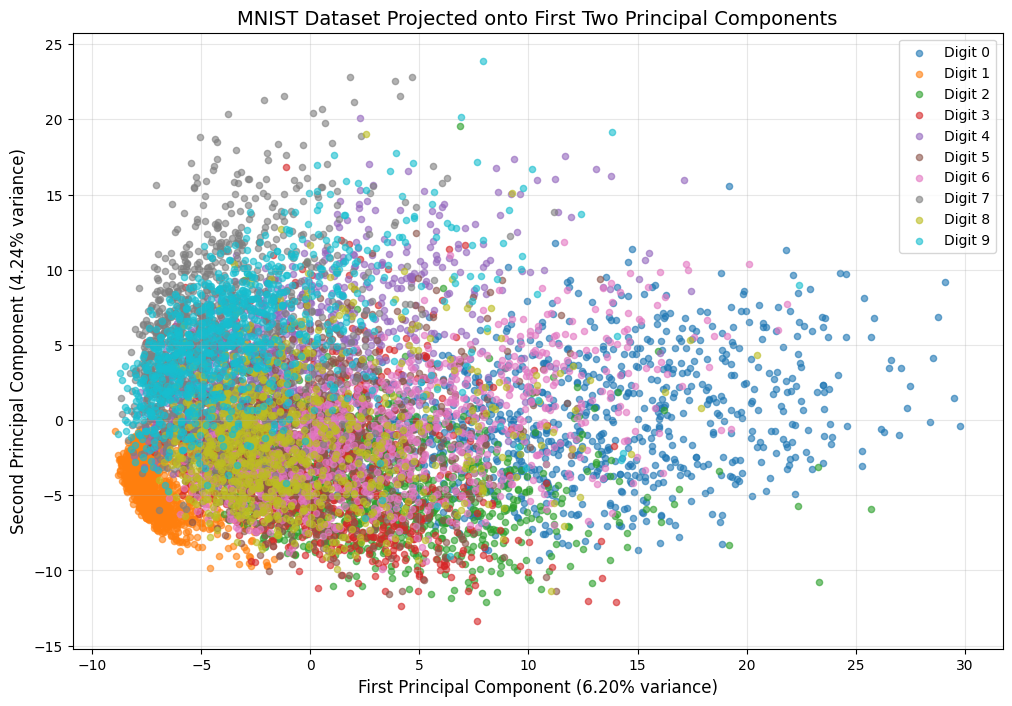

In [ ]:
plt.figure(figsize= (12,8))

for digit in range(10):
    indices = y == digit
    plt.scatter(x_2d[indices,0], x_2d[indices, 1],label=f'Digit {digit}', alpha=0.6, s=20)

plt.xlabel(f'First Principal Component ({pca_2d.explained_variance_ratio_[0]*100:.2f}% variance)',
           fontsize=12)
plt.ylabel(f'Second Principal Component ({pca_2d.explained_variance_ratio_[1]*100:.2f}% variance)',
           fontsize=12)
plt.title('MNIST Dataset Projected onto First Two Principal Components', fontsize=14)
plt.legend(loc='best', fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

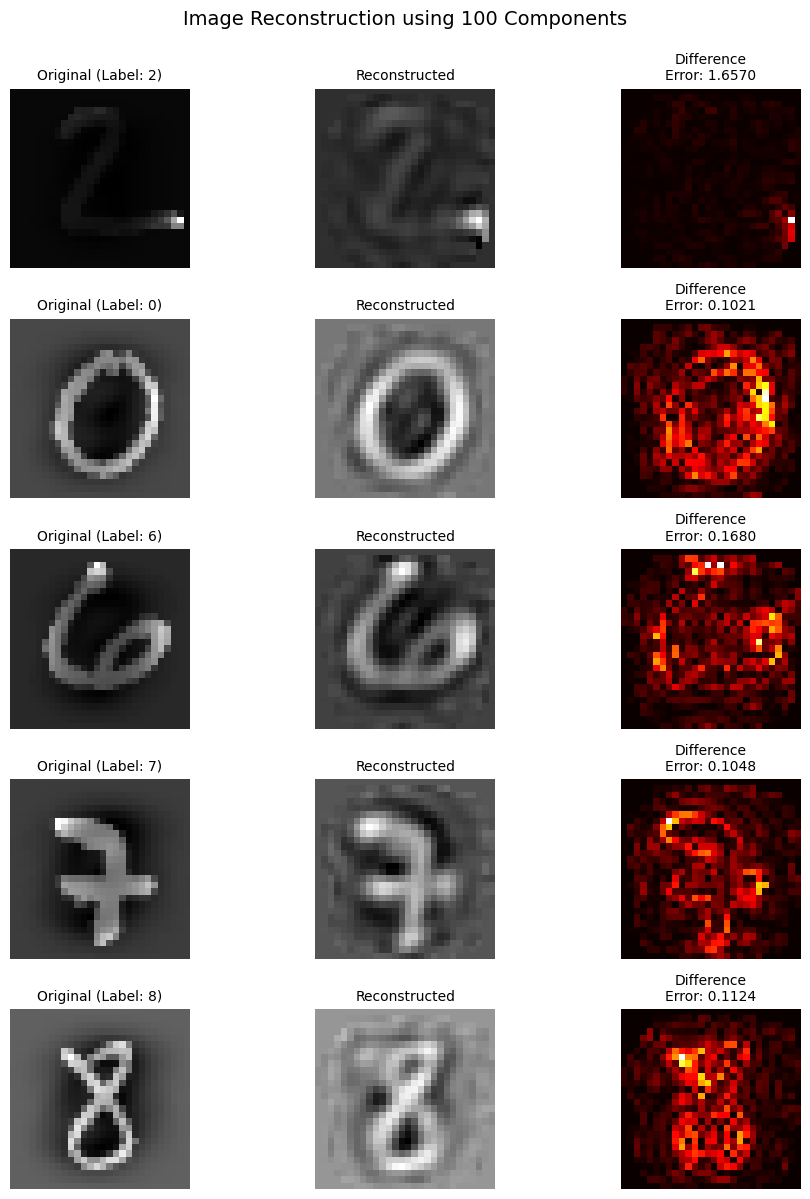

In [ ]:
# Let's see how well we can reconstruct original images from reduced data

# Select a few sample images
sample_indices = [0, 100, 200, 300, 400]

fig, axes = plt.subplots(len(sample_indices), 3, figsize=(10, 12))

for idx, sample_idx in enumerate(sample_indices):
    # Original image
    original = x_standardized[sample_idx].reshape(28, 28)

    # Transform to PCA space and back
    pca_coords = pca.transform(x_standardized[sample_idx].reshape(1, -1))
    reconstructed = pca.inverse_transform(pca_coords).reshape(28, 28)

    # Calculate reconstruction error
    error = np.mean((x_standardized[sample_idx] - reconstructed.flatten())**2)

    # Plot original
    axes[idx, 0].imshow(original, cmap='gray')
    axes[idx, 0].set_title(f'Original (Label: {y[sample_idx]})', fontsize=10)
    axes[idx, 0].axis('off')

    # Plot reconstructed
    axes[idx, 1].imshow(reconstructed, cmap='gray')
    axes[idx, 1].set_title(f'Reconstructed', fontsize=10)
    axes[idx, 1].axis('off')

    # Plot difference
    difference = np.abs(original - reconstructed)
    axes[idx, 2].imshow(difference, cmap='hot')
    axes[idx, 2].set_title(f'Difference\nError: {error:.4f}', fontsize=10)
    axes[idx, 2].axis('off')

plt.suptitle(f'Image Reconstruction using {n_components} Components', fontsize=14, y=0.995)
plt.tight_layout()
plt.show()

In [ ]:
# Split data into training and testing sets
x_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set size:", x_train.shape)
print("Testing set size:", X_test.shape)

# Train a Logistic Regression classifier on PCA-transformed data
print("\nTraining Logistic Regression on PCA features...")
clf_pca = LogisticRegression(max_iter=1000, random_state=42)
clf_pca.fit(x_train, y_train)

# Make predictions
y_pred_pca = clf_pca.predict(X_test)

# Evaluate accuracy
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"\nAccuracy with PCA ({n_components} components): {accuracy_pca:.4f}")

# Print detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_pca))

Training set size: (7999, 100)
Testing set size: (2000, 100)

Training Logistic Regression on PCA features...

Accuracy with PCA (100 components): 0.9130

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       196
           1       0.97      0.98      0.97       227
           2       0.92      0.88      0.90       207
           3       0.89      0.90      0.89       202
           4       0.93      0.91      0.92       196
           5       0.88      0.81      0.85       178
           6       0.90      0.95      0.93       192
           7       0.90      0.91      0.90       205
           8       0.88      0.89      0.89       195
           9       0.89      0.91      0.90       202

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



In [ ]:
# Train on original data for comparison
# Split original standardized data
x_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split( x_standardized, y, test_size=0.2, random_state=42, stratify=y
)

print("Training Logistic Regression on ORIGINAL features...")
import time

# Measure training time with PCA
start_time = time.time()
clf_pca_time = LogisticRegression(max_iter=1000, random_state=42)
clf_pca_time.fit(x_train, y_train)
pca_time = time.time() - start_time

# Measure training time without PCA
start_time = time.time()
clf_orig = LogisticRegression(max_iter=1000, random_state=42)
clf_orig.fit(x_train_orig, y_train_orig)
orig_time = time.time() - start_time

# Evaluate both models
accuracy_orig = accuracy_score(y_test_orig, clf_orig.predict(X_test_orig))

print("\n" + "="*50)
print("COMPARISON: PCA vs Original Data")
print("="*50)
print(f"PCA Features: {n_components}")
print(f"PCA Accuracy: {accuracy_pca:.4f}")
print(f"PCA Training Time: {pca_time:.2f} seconds")
print(f"\nOriginal Features: 784")
print(f"Original Accuracy: {accuracy_orig:.4f}")
print(f"Original Training Time: {orig_time:.2f} seconds")
print(f"\nSpeedup Factor: {orig_time/pca_time:.2f}x faster")
print(f"Dimension Reduction: {784/n_components:.2f}x smaller")
print("="*50)

Training Logistic Regression on ORIGINAL features...

COMPARISON: PCA vs Original Data
PCA Features: 100
PCA Accuracy: 0.9130
PCA Training Time: 3.71 seconds

Original Features: 784
Original Accuracy: 0.8950
Original Training Time: 10.68 seconds

Speedup Factor: 2.88x faster
Dimension Reduction: 7.84x smaller


In [ ]:
# Save the PCA model for future use
import pickle

# Save PCA model
with open('pca_model.pkl', 'wb') as f:
    pickle.dump(pca, f)

# Save scaler
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("Models saved successfully!")

# Load models later
with open('pca_model.pkl', 'rb') as f:
    loaded_pca = pickle.load(f)

with open('scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# Use loaded models for new data
# new_data_pca = loaded_pca.transform(loaded_scaler.transform(new_data))

print("Models loaded successfully!")

In [ ]:
from google.colab import drive
import pickle
import os

# 1. Mount Google Drive
# (If already mounted, this will do nothing)
drive.mount('/content/drive')

# 2. Set the save directory and path
save_dir = '/content/drive/MyDrive/Colab Notebooks/Models'
os.makedirs(save_dir, exist_ok=True)  # This ensures the directory exists
save_path = os.path.join(save_dir, 'pca_model.pkl')

# 3. Save your model
with open(save_path, 'wb') as f:
    pickle.dump(pca, f)

print('Model saved successfully at:', save_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Model saved successfully at: /content/drive/MyDrive/Colab Notebooks/Models/pca_model.pkl


In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 72.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 116.0 MB/s eta 0:00:00


In [ ]:
import streamlit as st
import numpy as np
import pandas as pd
import pickle
import os

# Set your saved model path
MODEL_PATH = '/content/drive/MyDrive/Colab Notebooks/Models/pca_model.pkl'

# Load PCA model from Google Drive
with open(MODEL_PATH, 'rb') as f:
    pca = pickle.load(f)

st.title("MNIST Digit Prediction using PCA")
st.write("Upload your handwritten digit image in CSV (28x28, pixel values 0-255) below:")

uploaded_file = st.file_uploader("Upload CSV file", type=["csv"])

if uploaded_file is not None:
    # Read CSV
    img_df = pd.read_csv(uploaded_file, header=None)
    if img_df.shape == (28, 28):
        st.success("Image loaded: 28x28 shape detected")
        # Flatten and normalize
        img_vector = img_df.values.flatten()
        img_vector = img_vector / 255.0  # Normalize
        img_vector = img_vector.reshape(1, -1)  # reshape for PCA
        # Apply PCA
        transformed = pca.transform(img_vector)
        st.write("PCA Transformed Feature Vector:")
        st.write(transformed)
        st.image(img_df.values, caption="Uploaded Digit", clamp=True, width=150)
        # For demonstration: Simulate prediction (since only PCA is loaded)
        st.info("This demo only transforms using PCA. Connect a classifier for full prediction!")
    else:
        st.error("CSV shape incorrect, should be 28x28 pixel values.")
else:
    st.write("Or, enter 784 pixel values (0-255) below and press Predict.")
    user_pixels = st.text_area("Paste 784 comma-separated pixel values here (optional):")
    if st.button("Predict"):
        try:
            values = np.array([int(x) for x in user_pixels.strip().split(',')])
            if values.size == 784:
                values = values / 255.0
                values = values.reshape(1, -1)
                transformed = pca.transform(values)
                st.success("PCA Transformation successful!")
                st.write(transformed)
                st.info("Connect a trained classifier for digit prediction.")
            else:
                st.error("Please enter exactly 784 pixel values.")
        except Exception as e:
            st.error(f"Input error: {str(e)}")

2025-10-18 12:40:27.123 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:40:27.424 
  command:

    streamlit run /usr/local/lib/python3.12/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-10-18 12:40:27.425 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:40:27.427 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:40:27.428 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:40:27.430 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:40:27.433 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-18 12:40:27.434 Thread 'MainThread': mi